# 第 5 章　正态线性模型｜用 Python 动手学统计学

## 第 2 节　方差分析

### 8. 环境准备

In [2]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 用于估计统计模型的库 (部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

### 9. 生成数据并可视化

In [2]:
# 定义一组示例数据
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]
beer = [6,8,2,4,10,12]

# 转换成数据帧
weather_beer = pd.DataFrame({
    "beer"   : beer,
    "weather": weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


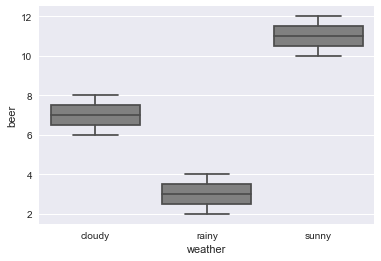

In [3]:
# 绘出箱形图
sns.boxplot(x = "weather",y = "beer",
            data = weather_beer, color='gray')

In [5]:
# 每种天气下销售额的均值
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


### 10. 实现：方差分析①：计算组间平方和与组内平方和

In [6]:
# 天气的影响 (对应 weather 变量)
effect = [7,7,3,3,11,11]

In [7]:
# 组间偏差平方和
mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect) ** 2 )
squares_model

64.000

In [8]:
# 无法用天气来解释的部分, 即误差
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [9]:
# 组内偏差平方和
squares_resid = sp.sum(resid ** 2)
squares_resid

6

### 11. 实现：方差分析②：计算组间方差与组内方差

In [10]:
df_model = 2 # 组间差异的自由度
df_resid = 3 # 组内差异的自由度

In [11]:
# 组间均方 (方差)
variance_model = squares_model / df_model
variance_model

32.000

In [12]:
# 组内均方 (方差)
variance_resid = squares_resid / df_resid
variance_resid

2.000

### 12. 实现：方差分析③：计算 p 值

In [13]:
# F 比
f_ratio = variance_model / variance_resid
f_ratio

16.000

In [19]:
# p 值
1 - sp.stats.f.cdf(x=f_ratio,dfn=df_model,dfd=df_resid)

0.025

### 15. 实现：statsmodels 中的方差分析

In [20]:
# 建立正态线性模型
anova_model = smf.ols("beer ~ weather", 
                      data = weather_beer).fit()

In [21]:
# 方差分析的结果
print(sm.stats.anova_lm(anova_model, typ=2))

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN


### 17. 模型系数的含义

In [22]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

### 18. 使用模型分离效应和误差

In [23]:
# 拟合值
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [24]:
# 残差
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

### 19. 回归模型中的方差分析

In [4]:
# 读取数据
beer = pd.read_csv("5-1-1-beer.csv")

# 估计模型
lm_model = smf.ols(formula = "beer ~ temperature", 
                   data = beer).fit()

In [5]:
df_lm_model = 1  # 模型自由度
df_lm_resid = 28 # 残差自由度

In [6]:
# 拟合值
lm_effect = lm_model.fittedvalues
# 残差
lm_resid = lm_model.resid
# 气温的影响力度
mu = sp.mean(lm_effect)
squares_lm_model = sp.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model
# 残差的方差
squares_lm_resid = sp.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid
# F 比
f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

28.447

In [30]:
# 参考: p 值 (结果在截断后约等于 0)
1 - sp.stats.f.cdf(
    x=f_value_lm,dfn=df_lm_model,dfd=df_lm_resid)

0.000

In [36]:
# 方差分析表
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [32]:
# 模型的 sumamry
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           1.11e-05
Time:                        09:49:21   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""